In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #for visualization purpose
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\91863\Desktop\pythonda\dpy 1\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns 
df.drop(['Status','unnamed1'], axis=1, inplace = True)

In [7]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#check for null values >>
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True )

In [10]:
#change datatype of one column named 'Amount' to find the appropriate insights. >>
df['Amount'] = df['Amount'].astype(int)

In [11]:
#lets check whether the datatype of column has changes or not. >>
df['Amount'].dtypes

dtype('int32')

In [12]:
#lets see how many and what columns are there in the data >>
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#lets see a little summary of the columns('Age','Amount','Amount') using describe() function. >>
df[['Age','Amount','Amount']].describe()

,Age,Amount,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,9453.610553
std,12.753866,5222.355168,5222.355168
min,12.000000,188.000000,188.000000
25%,27.000000,5443.000000,5443.000000
50%,33.000000,8109.000000,8109.000000
75%,43.000000,12675.000000,12675.000000
max,92.000000,23952.000000,23952.000000


# **Exploratory Data Analysis**
### **Gender**

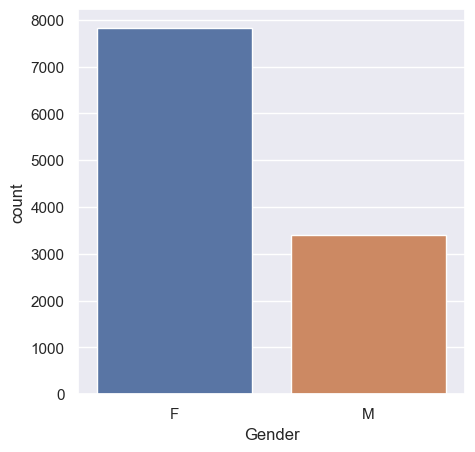

In [38]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.countplot(x = 'Gender',data = df, hue = 'Gender')

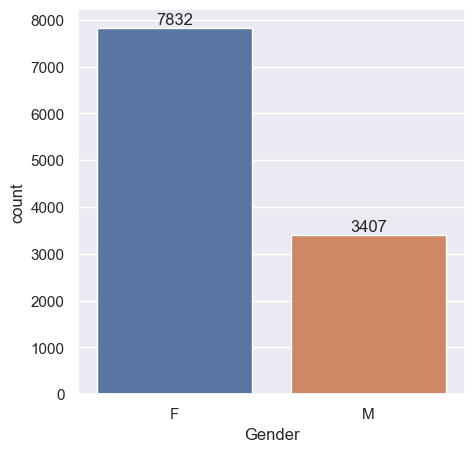

In [39]:
ax = sns.countplot(x = 'Gender',data = df, hue = 'Gender')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

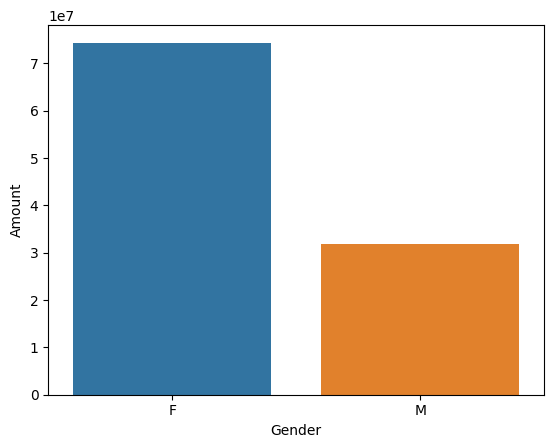

In [16]:
# plotting a bar chart of total sales in the basis of gender. >>
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x='Gender', y='Amount',data = sales_gen, hue ='Gender')

*From the above bar chart we can see that most of the sales is from female and the purchasing power of the female is also greater than men.*

#### **Age**

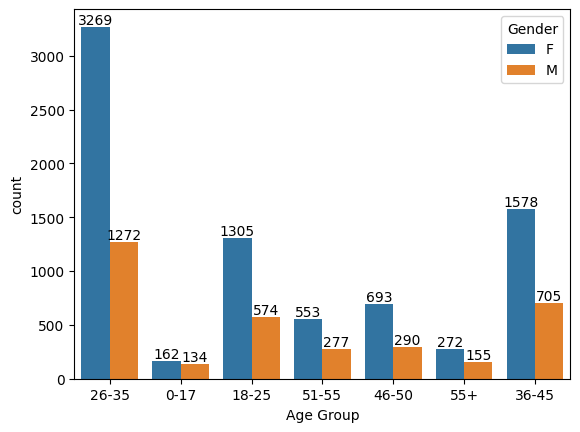

In [17]:
ax = sns.countplot(x='Age Group', hue = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

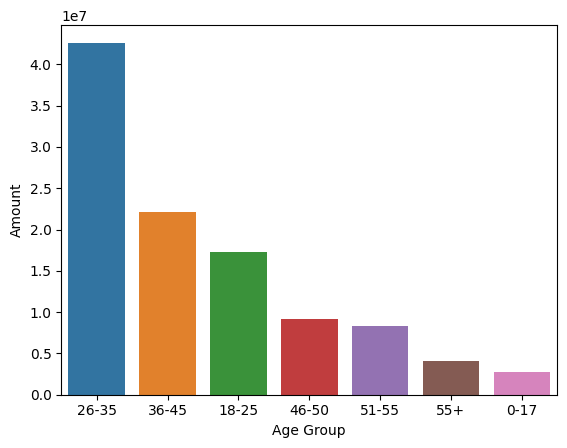

In [18]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)

sns.barplot(x='Age Group', y ='Amount', data= sales_age, hue ='Age Group')

 *From above graphs we can see that most of the sales is from the age group of 26-35 yrs customers.*

#### **State**

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Amount'>

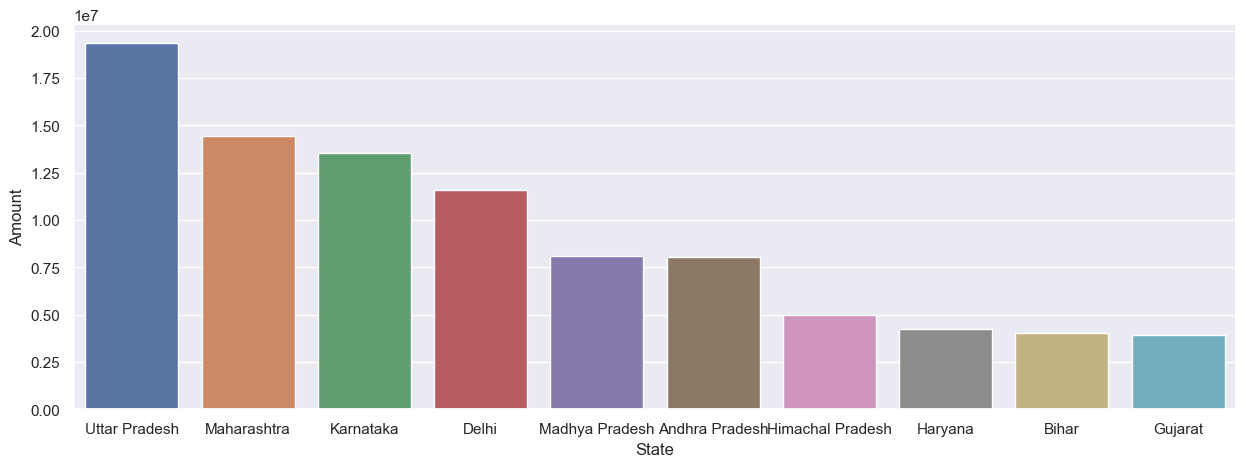

In [20]:
#Total Amount in the basis of states, we will see the top 10 states.>>
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount', hue= 'State', data= sales_state)

<Axes: xlabel='State', ylabel='Amount'>

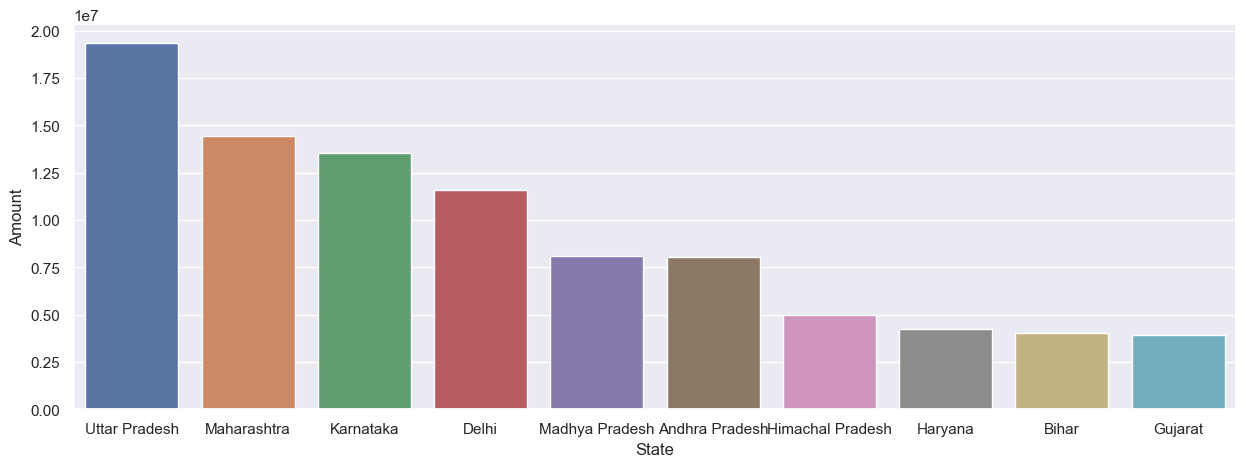

In [21]:
# Sales in the basis of states, we will see the top 10 states.>>
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount', hue= 'State', data= sales_state)

*From above chart we can see that most of the Orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.*


#### **Marital Status**

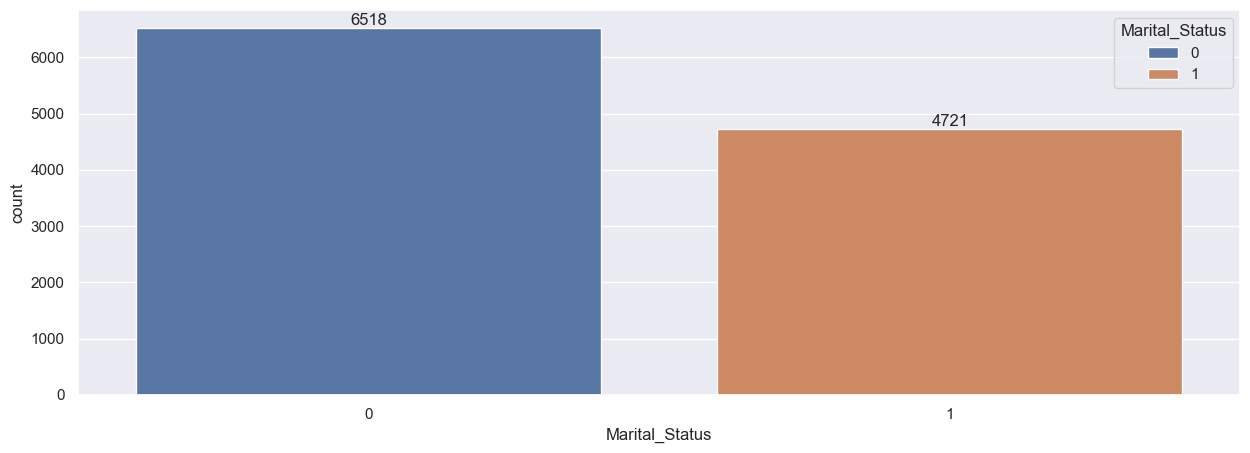

In [22]:
ax = sns.countplot(data = df , x = 'Marital_Status', hue = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

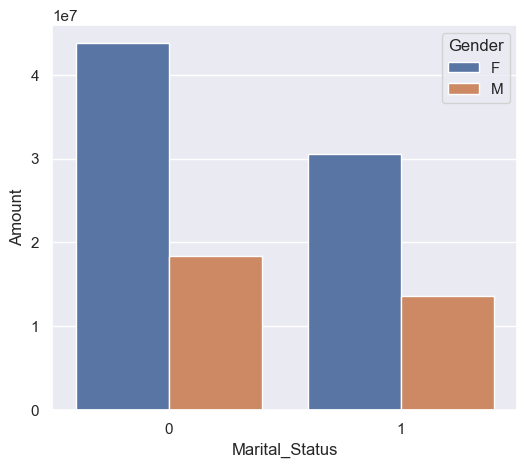

In [23]:
# Sales in the basis of married and unmarried womens.>>
sales_women = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data= sales_women, x='Marital_Status',y='Amount', hue= 'Gender')

*From above chart we can see that most of the sales is coming from married womens.*

#### **Occupation**

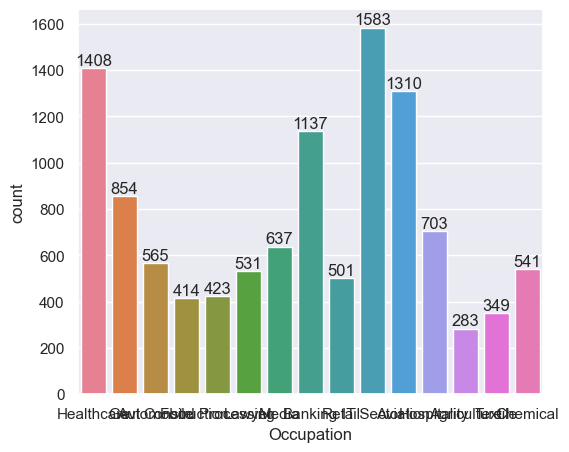

In [24]:
ax = sns.countplot(data = df , x= 'Occupation', hue = 'Occupation')
sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

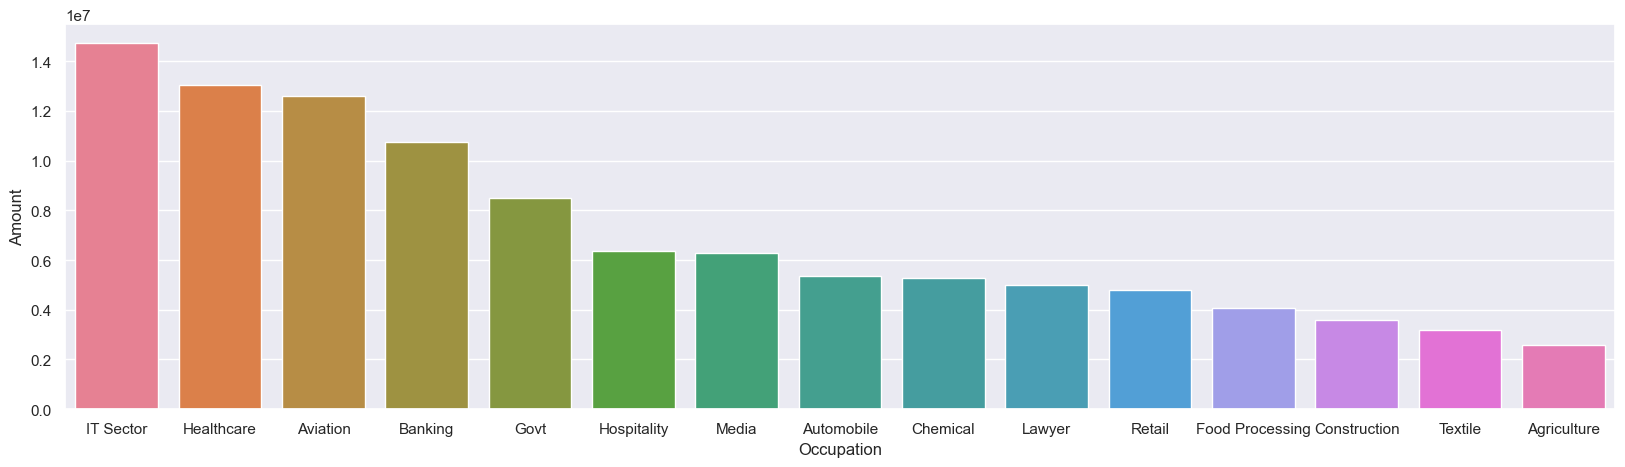

In [25]:
#sales according to occupation. >>
sales_occu = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)

sns.barplot(x='Occupation', y= 'Amount', data = sales_occu, hue= 'Occupation')

*From the above graph we can see that most of the buyers is working in IT sector, Healthcare & Aviation sector.*

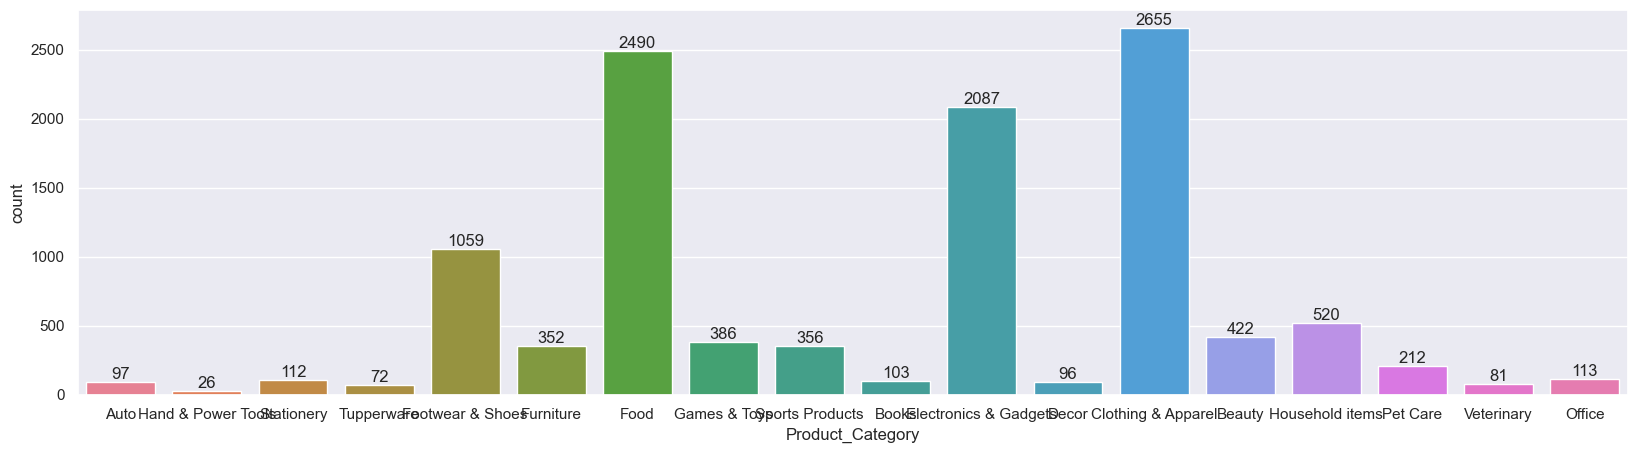

In [26]:
ax = sns.countplot(data = df , x= 'Product_Category',hue = 'Product_Category')

sns.set(rc={'figure.figsize':(25,6)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

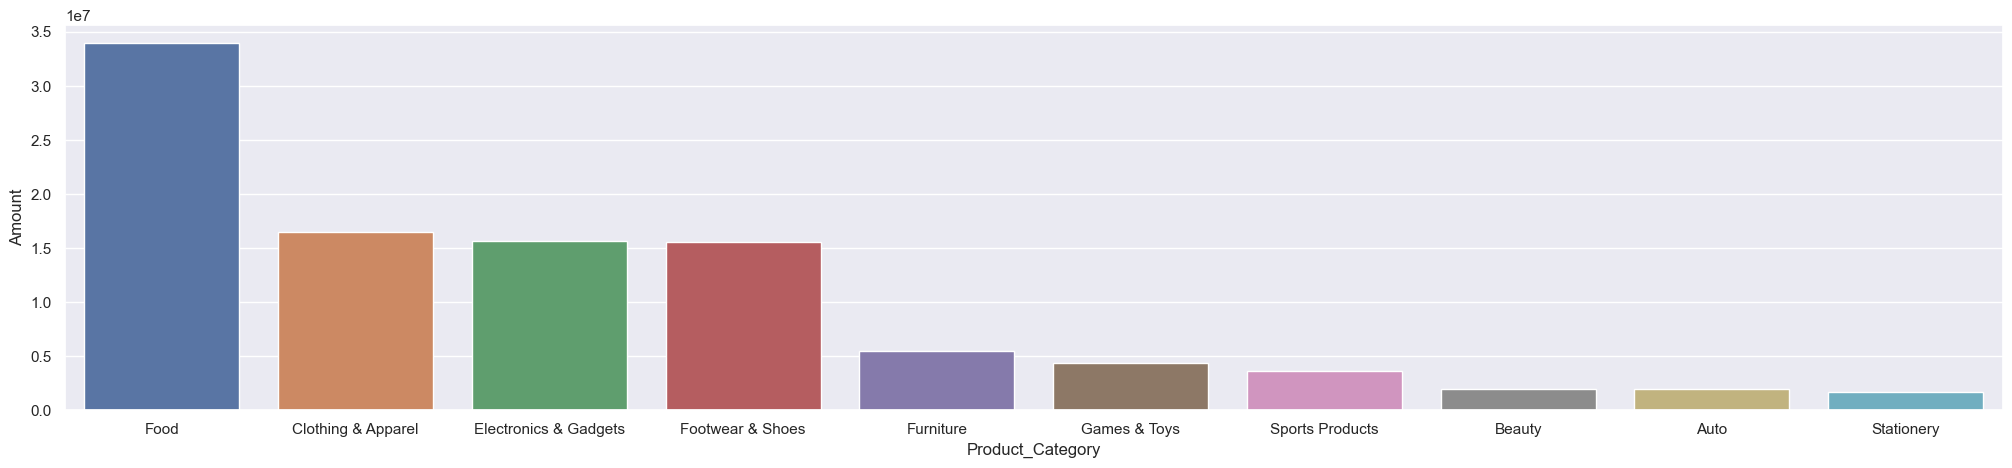

In [27]:
#sales according to Product category. >>
sales_prod = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Product_Category', y= 'Amount', data = sales_prod, hue= 'Product_Category')

*From the above graph we can see that most of the sales is generating from food, clothing/Apparel & electronics items.*

<Axes: xlabel='Product_ID', ylabel='Orders'>

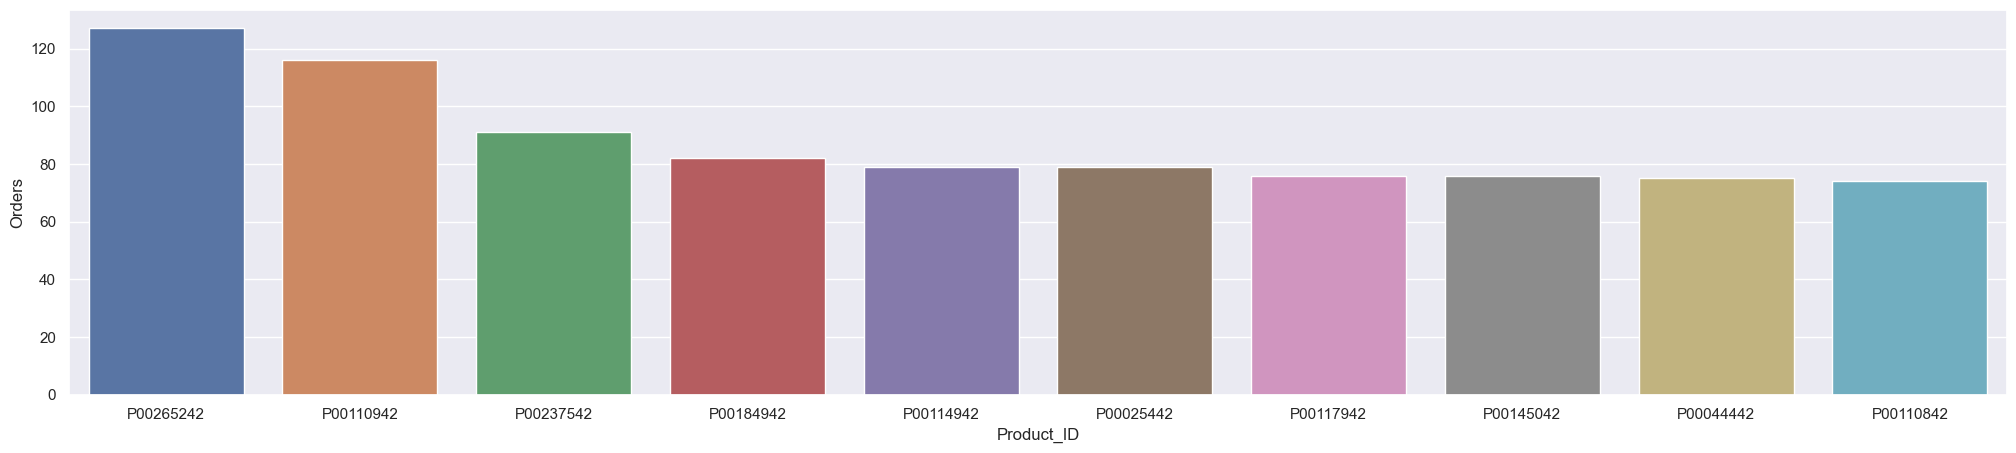

In [28]:
# Top 10 most sold products. >>
sales_topprod = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by= 'Orders', ascending= False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Product_ID', y= 'Orders', data = sales_topprod, hue= 'Product_ID')

<Axes: xlabel='Product_ID'>

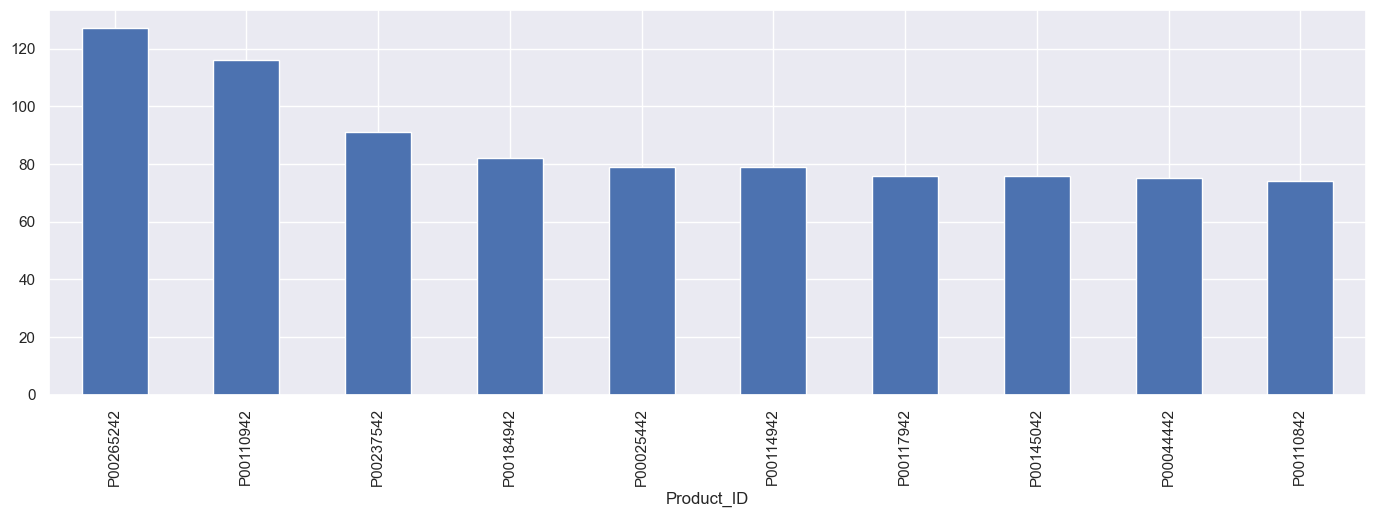

In [29]:
# Top 10 most sold products. >>
fig1,ax1 = plt.subplots(figsize = (17,5))
df.groupby(['Product_ID'])['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind= 'bar')